In [22]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

In [23]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

20
found *.csv file: 
['/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiao

In [24]:
file_num=3

In [25]:
j=file_num

data=pd.read_csv(nc_filename[j])

y= np.array(data['depth']);
name= data['name'][0];
part_=np.array(data['230Th part.']);
diss_=np.array(data['230Th diss.']);

part_=np.ma.masked_where(part_<=0,part_)
diss_=np.ma.masked_where(part_<=0,diss_)
y=np.ma.masked_where(part_<=0,y)


part_=part_.compressed()
diss_=diss_.compressed()
y=y.compressed()

In [26]:
print part_


[ 0.013  0.013  0.03   0.067  0.102  0.238  0.254]


In [27]:
X_1=np.vstack([-diss_,part_,np.zeros(len(part_))]).T

In [28]:
print X_1

[[-0.092  0.013  0.   ]
 [-0.063  0.013  0.   ]
 [-0.092  0.03   0.   ]
 [-0.129  0.067  0.   ]
 [-0.227  0.102  0.   ]
 [-0.29   0.238  0.   ]
 [-0.27   0.254  0.   ]]


In [29]:
# prepare a y' that has 0 added to the begining so that we can calculate dz later
num=0
y_=np.insert(y,0,num)
dz=y_[1:]-y_[0:-1]

print y_,dz

[   0    6   50  350  500 1050 1450 2150] [  6  44 300 150 550 400 700]


In [30]:
# prepare a part' that has 0 added to the begining so that we can calculate d(part) later

part=np.insert(part_,0,num)
dpart=part[1:]-part[0:-1]

print part_,dpart

[ 0.013  0.013  0.03   0.067  0.102  0.238  0.254] [ 0.013  0.     0.017  0.037  0.035  0.136  0.016]


In [31]:
X_2=np.vstack([diss_,-part_,dpart/dz]).T
print X_2

[[  9.20000000e-02  -1.30000000e-02   2.16666667e-03]
 [  6.30000000e-02  -1.30000000e-02   0.00000000e+00]
 [  9.20000000e-02  -3.00000000e-02   5.66666667e-05]
 [  1.29000000e-01  -6.70000000e-02   2.46666667e-04]
 [  2.27000000e-01  -1.02000000e-01   6.36363636e-05]
 [  2.90000000e-01  -2.38000000e-01   3.40000000e-04]
 [  2.70000000e-01  -2.54000000e-01   2.28571429e-05]]


In [32]:
# stack up X_1 and X_2
X=np.vstack([X_1,X_2])
print X

[[ -9.20000000e-02   1.30000000e-02   0.00000000e+00]
 [ -6.30000000e-02   1.30000000e-02   0.00000000e+00]
 [ -9.20000000e-02   3.00000000e-02   0.00000000e+00]
 [ -1.29000000e-01   6.70000000e-02   0.00000000e+00]
 [ -2.27000000e-01   1.02000000e-01   0.00000000e+00]
 [ -2.90000000e-01   2.38000000e-01   0.00000000e+00]
 [ -2.70000000e-01   2.54000000e-01   0.00000000e+00]
 [  9.20000000e-02  -1.30000000e-02   2.16666667e-03]
 [  6.30000000e-02  -1.30000000e-02   0.00000000e+00]
 [  9.20000000e-02  -3.00000000e-02   5.66666667e-05]
 [  1.29000000e-01  -6.70000000e-02   2.46666667e-04]
 [  2.27000000e-01  -1.02000000e-01   6.36363636e-05]
 [  2.90000000e-01  -2.38000000e-01   3.40000000e-04]
 [  2.70000000e-01  -2.54000000e-01   2.28571429e-05]]


In [33]:
Q=0.0267
Z1=-np.ones(len(part_))*Q
Z2=np.zeros(len(part_))
Z=np.hstack([Z1,Z2])
print Z.shape

(14,)


In [34]:
#coeff=np.linalg.lstsq(X,Z)[0]

In [35]:
#print coeff

In [36]:
coeff=np.linalg.lstsq(X_1,Z1)[0]
print coeff

[ 0.26947193  0.20242088  0.        ]


In [37]:
# check

np.dot(X,coeff)

array([-0.02215995, -0.01434526, -0.01871879, -0.02119968, -0.0405232 ,
       -0.02997069, -0.02134252,  0.02215995,  0.01434526,  0.01871879,
        0.02119968,  0.0405232 ,  0.02997069,  0.02134252])

In [38]:
Z

array([-0.0267, -0.0267, -0.0267, -0.0267, -0.0267, -0.0267, -0.0267,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

k 0.0236232500559      k_1 -0.0570770504456        1983 CESAR
k 0.0696994466605      k_1 -0.0251371281715        1987 ARKIV/3 Stn1
k 0.0540100239408      k_1 -0.0169539166488        1987 ARKIV/3 Stn2
k 0.269471932234      k_1 0.202420882512        1987 ARKIV/3 Stn3
k 0.0844824330948      k_1 -0.0459751129909        1987 ARKIV/3 Stn4
k 0.0531403621214      k_1 -0.00633267382335        1991 ARCTIC EXPEDITION Stn1
k 0.0674013423325      k_1 0.0748799296583        1991 ARCTIC EXPEDITION Stn2
k 0.0307017486409      k_1 0.0470422520085        1991 ARCTIC EXPEDITION Stn3
k 0.155733834692      k_1 0.398510205731        1991 ARCTIC EXPEDITION Stn4
k 0.0451099424436      k_1 -0.0298719374213        1991 ARCTIC EXPEDITION Stn5
k 0.0665919845135      k_1 0.000121723551764        1991 ARCTIC EXPEDITION Stn6
k 0.0316938684892      k_1 -0.174036577669        ASW 2000 Stn1


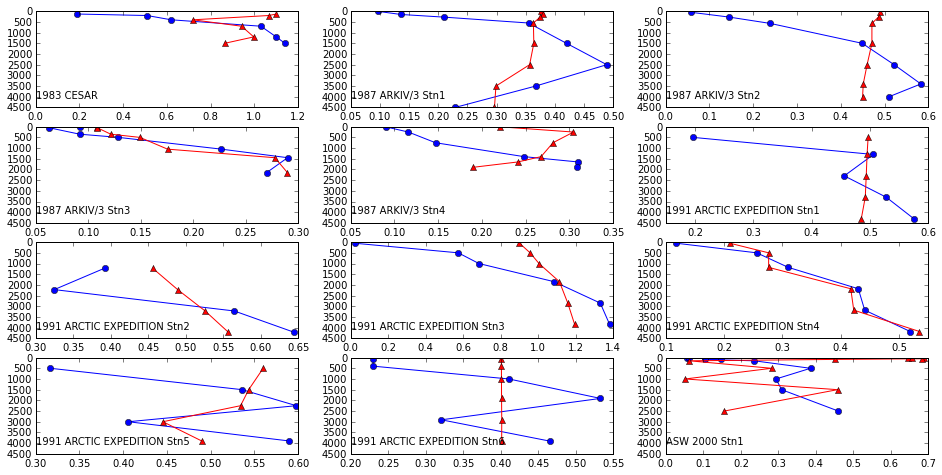

In [39]:
# write a function based on the tests above
file_num=12

k  =np.zeros(file_num)
k_1=np.zeros(file_num)
ax=plt.figure(1, figsize=(16,10))
for j in range (file_num):

    data=pd.read_csv(nc_filename[j])

    y= np.array(data['depth']);
    name= data['name'][0];
    part_=np.array(data['230Th part.']);
    diss_=np.array(data['230Th diss.']);

    part_=np.ma.masked_where(part_<=0,part_)
    diss_=np.ma.masked_where(part_<=0,diss_)
    y=np.ma.masked_where(part_<=0,y)

    part_=part_.compressed()
    diss_=diss_.compressed()
    y=y.compressed()
    

    X_1=np.vstack([-diss_,part_,np.zeros(len(part_))]).T
    Q=0.0267
    Z1=-np.ones(len(part_))*Q

    coeff=np.linalg.lstsq(X_1,Z1)[0]
    k[j] =coeff[0]
    k_1[j]=coeff[1]
    print 'k',coeff[0],'     k_1',coeff[1],'      ',name
    
    ax=plt.subplot(5,3,j+1)
    
    
    plt.plot(diss_[:],y[:],'o-',c='b',label='data (diss.)')
    matrix_sol=(Q/coeff[0]+coeff[1]/coeff[0]*part_[:])
    plt.plot(matrix_sol,y[:], '^-',c='r',label='matrix_solver (diss.)')
    plt.ylim([0,4500]);ax.annotate(name,xy=(0.,0.1),xycoords='axes fraction')
    plt.gca().invert_yaxis()
    

k 0.0379758930302      k_1 0.138919339758        1983 CESAR
k 0.137662349153      k_1 0.454211699121        1987 ARKIV/3 Stn1
k 0.113346884154      k_1 0.275700896827        1987 ARKIV/3 Stn2
k 0.295921230575      k_1 0.25949590627        1987 ARKIV/3 Stn3
k 0.275867426269      k_1 0.40719726129        1987 ARKIV/3 Stn4
k 0.353977272727      k_1 1.82045454545        1991 ARCTIC EXPEDITION Stn1
k 0.110424304266      k_1 0.306332536876        1991 ARCTIC EXPEDITION Stn2
k 0.0992125516156      k_1 0.52683642216        1991 ARCTIC EXPEDITION Stn3
k 0.155733834692      k_1 0.398510205731        1991 ARCTIC EXPEDITION Stn4
k 0.125520483546      k_1 0.555876427132        1991 ARCTIC EXPEDITION Stn5
k 0.154924411396      k_1 0.454050674625        1991 ARCTIC EXPEDITION Stn6
k 0.346285763312      k_1 1.07212631971        ASW 2000 Stn1


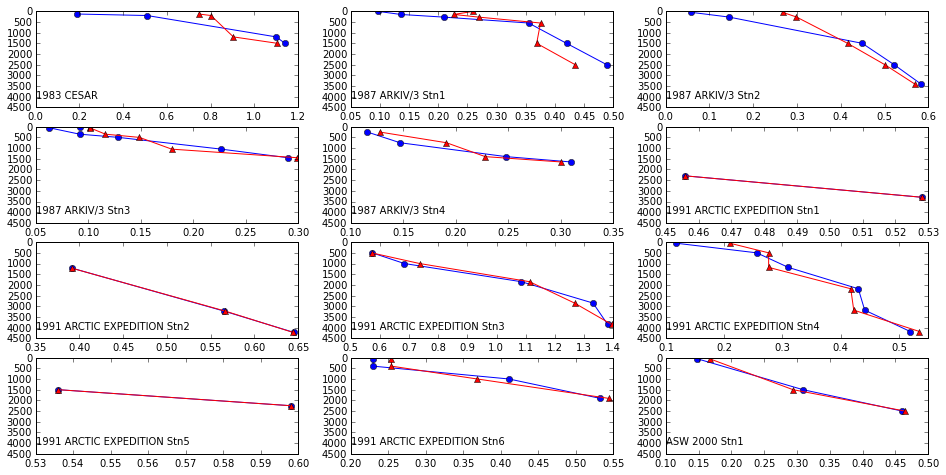

In [40]:
# write a function based on the tests above
file_num=12

k  =np.zeros(file_num)
k_1=np.zeros(file_num)
ax=plt.figure(1, figsize=(16,10))
for j in range (file_num):

    data=pd.read_csv(nc_filename[j])

    y= np.array(data['depth']);
    name= data['name'][0];
    part_=np.array(data['230Th part.']);
    diss_=np.array(data['230Th diss.']);

    part_=np.ma.masked_where(part_<=0,part_)
    diss_=np.ma.masked_where(part_<=0,diss_)
    y=np.ma.masked_where(part_<=0,y)

    part_=part_.compressed()
    diss_=diss_.compressed()
    y=y.compressed()
    
    rm=[[2,len(y)-3],[len(y)-1,len(y)-2],[2,len(y)-1],[len(y)-1],[0,len(y)-1],[0,1,len(y)-1],[1],[0],[nan],\
        [0,len(y)-1,len(y)-2],[len(y)-1,len(y)-2],[0,1,2,len(y)-4,len(y)-5,len(y)-6,len(y)-3]]
    if j!=8:
        diss_=np.delete(diss_,rm[j],0)
        part_=np.delete(part_,rm[j],0)
        y=np.delete(y,rm[j],0)


    X_1=np.vstack([-diss_,part_,np.zeros(len(part_))]).T
    Q=0.0267
    Z1=-np.ones(len(part_))*Q

    coeff=np.linalg.lstsq(X_1,Z1)[0]
    k[j] =coeff[0]
    k_1[j]=coeff[1]
    print 'k',coeff[0],'     k_1',coeff[1],'      ',name
    
    ax=plt.subplot(5,3,j+1)
    
    
    plt.plot(diss_[:],y[:],'o-',c='b',label='data (diss.)')
    matrix_sol=(Q/coeff[0]+coeff[1]/coeff[0]*part_[:])
    plt.plot(matrix_sol,y[:], '^-',c='r',label='matrix_solver (diss.)')
    plt.ylim([0,4500]);ax.annotate(name,xy=(0.,0.1),xycoords='axes fraction')
    plt.gca().invert_yaxis()
    

In [41]:
i_summer= np.array([93,93,93,84,77.3,90,89,88,88.3,82.3,81.7,31.7]) # whole summer average in two years

i= np.array([90,89,85,81,69,86,83,80,71,75,80,15])# lowest in one point

#i= np.array([94.8,98.0,95.6,93.6,76.4,92.4,95.2,95.6,94.0,92.4,90.4,80.4])

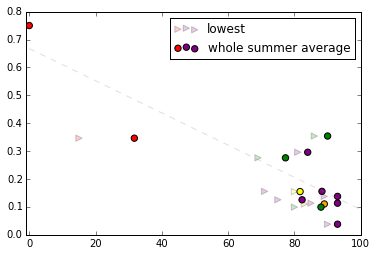

In [62]:
i_=np.insert(i,0,0)
isummer_=np.insert(i_summer,0,0)
k_=np.insert(k,0,0.75)
col=['r','purple','purple','purple','purple','g','g','orange','g','purple','purple','yellow']
plt.scatter(i_,k_,marker='>',c=col,s=40,alpha=0.2,label='lowest')
plt.scatter(isummer_,k_,marker='o',c=col,s=40,alpha=1,label='whole summer average')


from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(isummer_,k_)
x_input=np.array([0,100])
y_input=slope*x_input[:]+intercept

plt.plot(x_input,y_input,c='grey',ls='--',alpha=0.25)
plt.xlim(-1,100);plt.ylim(0,0.8);plt.legend()

In [264]:
rm=[[2],[len(y)-1],[len(y)-1],[len(y)-1],[0],[len(y)-2],[1],[0],[nan],\
        [len(y)-1,len(y)-2],[len(y)-1,len(y)-2],[len(y)-4,len(y)-5]]

In [267]:
a=np.array([1,2,3,4,5,6,7,8,9,0])

a=np.delete(a,rm[-1],axis=None)
print a

[1 2 3 4 5 8 9 0]


In [266]:
print rm

[[2], [9], [9], [9], [0], [8], [1], [0], [nan], [9, 8], [9, 8], [6, 5]]
